## Preprocessing of Data

In [33]:
#main packages
import pandas as pd
import numpy as np

#represent data
import matplotlib.pyplot as plt
import seaborn as sns

#alogorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
data_all=pd.read_csv("fetal_health.csv") # converts .csv into a dataframe object in pandas so it can work with the data

In [35]:
data_all.head(10) # displays first 10 rows of the data frame

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [36]:
print(f"Columns list :\n{data_all.columns}") # TDisplays column names of dataframe object

Columns list :
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [37]:
data_all.describe().T #generate descriptive statistics of the numerical columns in a dataframe , then performs matrix transpose

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [38]:
data_all.info() # displays column names, data types and non-null values in each column in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [39]:
# identifying columns with missing values

missingValues = data_all.columns[data_all.isnull().any()]                 # searches for columns with missing values
print(f"No of missing values:\n{data_all[missingValues].isnull().sum()}") # display no of missing values for each column
nullValues = data_all.columns[data_all.isna().any()]                      # identify whether values are null or NaN
print(f"Null or NAN values:\n{data_all[nullValues].isna().sum()}")        # prints the number of null or NaN values 

No of missing values:
Series([], dtype: float64)
Null or NAN values:
Series([], dtype: float64)


In [40]:
data_all["fetal_health"].describe() # describes the data set

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

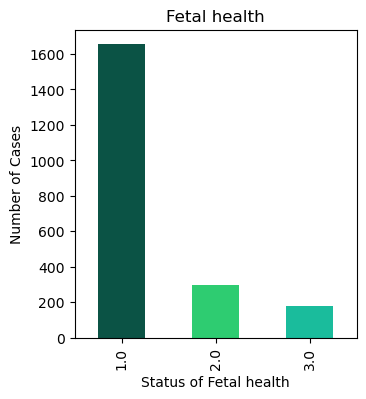

In [41]:
tot = data_all["fetal_health"].sum()  # gets the total number of records in the sample dataframe
            
normal = tot - 471        #number of normal classes
suspect = tot - 1831      #number of suspected classes
pathological = tot - 1950 #number of pathalogical classes

plt.figure(figsize = (10,5)) #  set the figure size of the plot
plt.subplot(121) # creates a subplot with 1 row and 2 columns and selects the first column for plotting the bar chart

# display the bar chart
vis_fetal_health = data_all.fetal_health.value_counts().plot(figsize=(8, 4), kind="bar", color = ["#0B5345", "#2ECC71", "#1ABC9C"])
plt.title("Fetal health")
plt.xlabel("Status of Fetal health") 
plt.ylabel("Number of Cases") 

plt.show()

## Outlier Identification

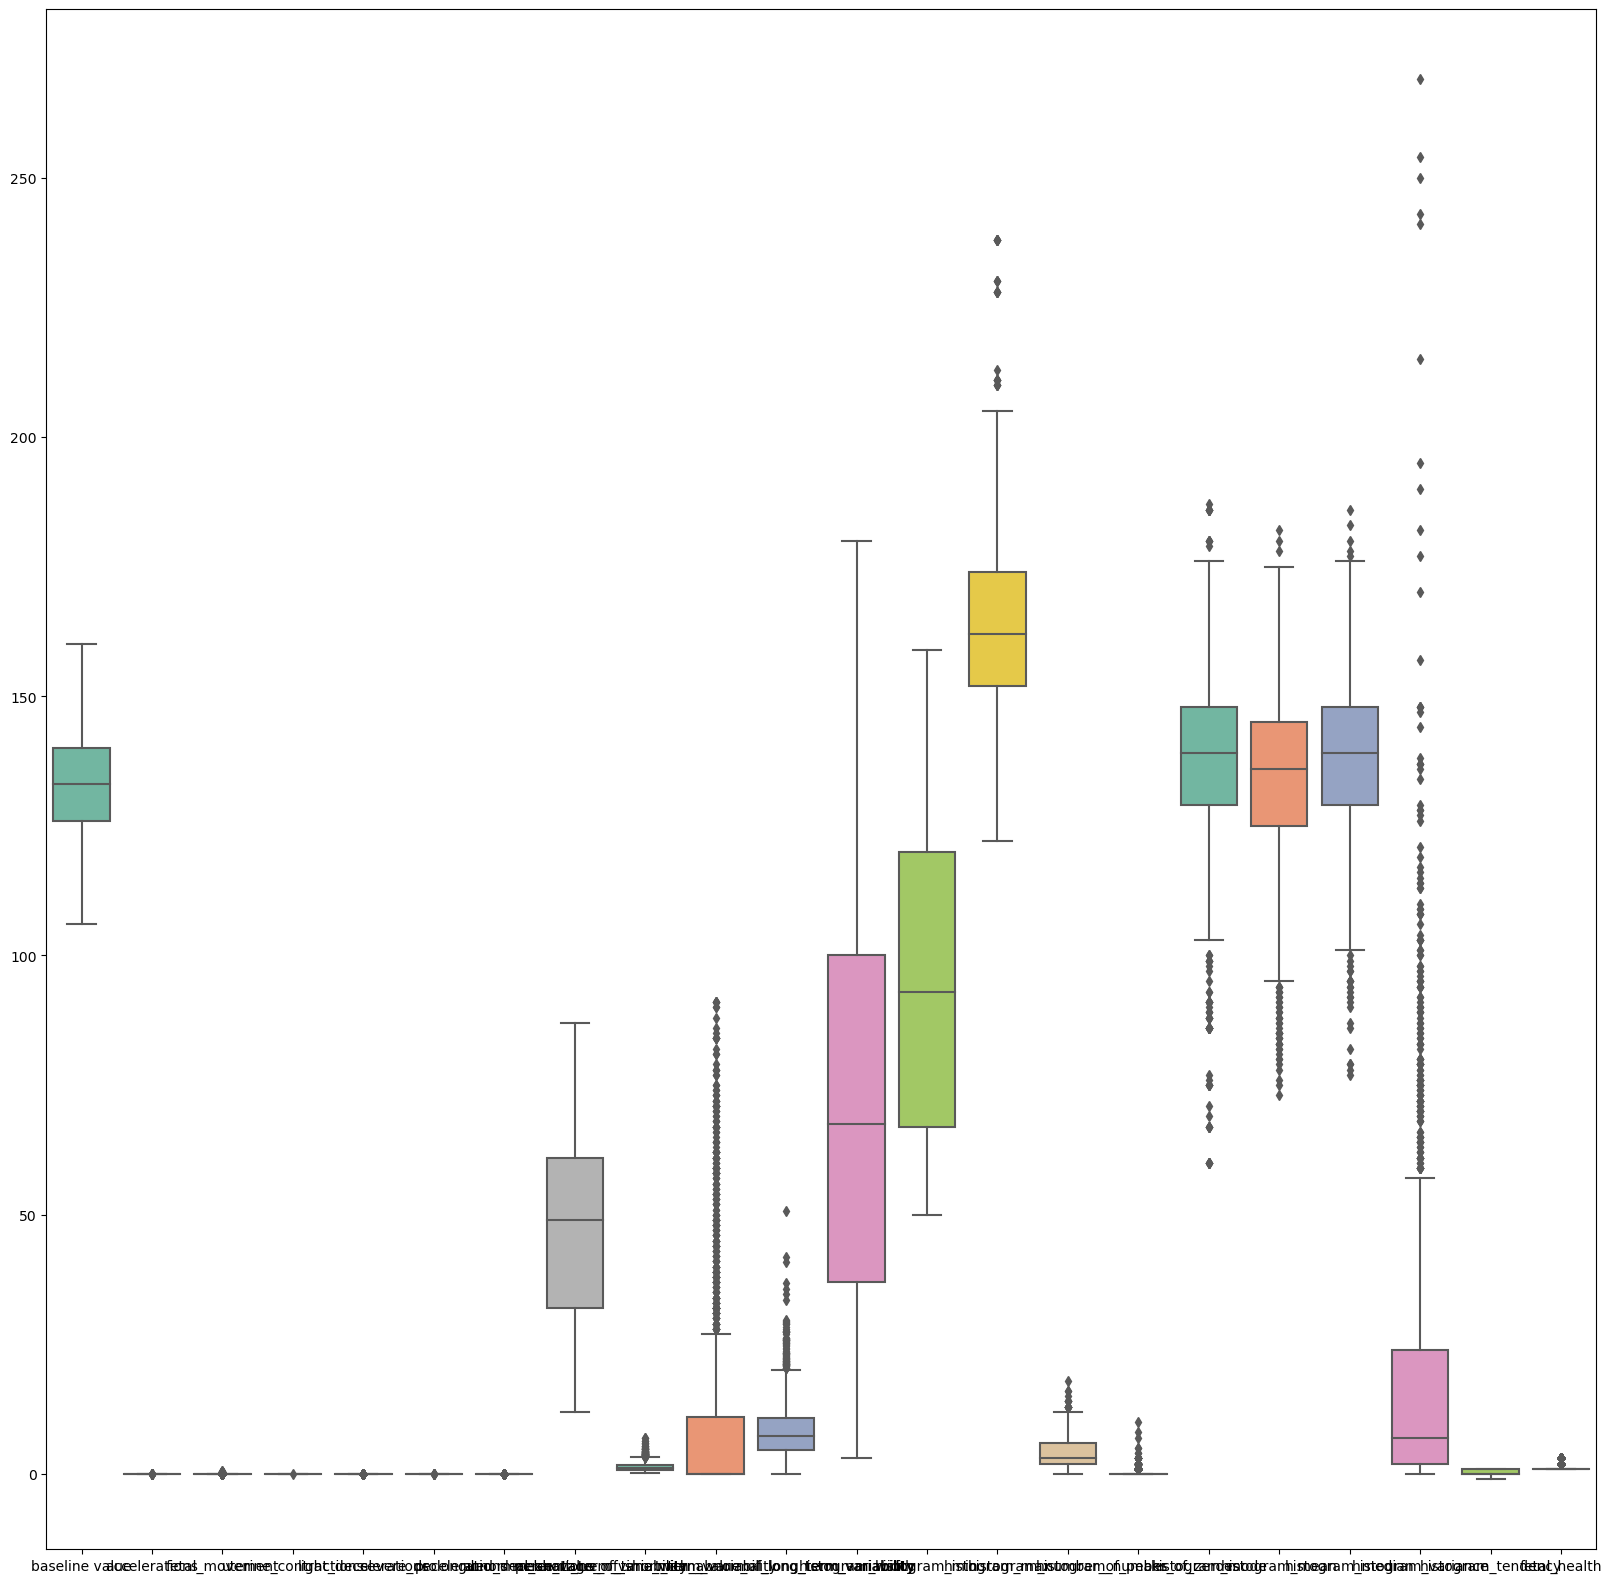

In [42]:
# displays outlier data
plt.figure(figsize=(20,20))
sns.boxplot(data = data_all, palette = "Set2")
plt.show()

## Outlier Removal

In [43]:
lowerlimit = data_all.histogram_variance.mean() - 3*data_all.histogram_variance.std() # define upper limit
upperlimit = data_all.histogram_variance.mean() + 3*data_all.histogram_variance.std() # define lower limit
data_all = data_all[(data_all.histogram_variance > lowerlimit) & (data_all.histogram_variance < upperlimit)] #extracts data within the upper and lower limits using variance field
data_all.shape[0] #no of records after outlier removal

2082

In [44]:
lowerlimit = data_all.histogram_median.mean() - 3*data_all.histogram_median.std() # define upper limit
upperlimit = data_all.histogram_median.mean() + 3*data_all.histogram_median.std() # define lower limit
data_all = data_all[(data_all.histogram_median > lowerlimit) & (data_all.histogram_median < upperlimit)] #extracts data within the upper and lower limits using mean and standard deviation fields
data_all.shape[0] #no of records after outlier removal

2065

In [45]:
lowerlimit = data_all.percentage_of_time_with_abnormal_long_term_variability.mean() - 3*data_all.percentage_of_time_with_abnormal_long_term_variability.std() # define upper limit
upperlimit = data_all.percentage_of_time_with_abnormal_long_term_variability.mean() + 3*data_all.percentage_of_time_with_abnormal_long_term_variability.std() # define lower limit
data_all = data_all[(data_all.percentage_of_time_with_abnormal_long_term_variability > lowerlimit) & (data_all.percentage_of_time_with_abnormal_long_term_variability < upperlimit)] 
#extracts data within the upper and lower limits
#using mean and standard deviation of "percentage_of_time_with_abnormal_long_term_variability" column
data_all.shape[0] #no of records after outlier removal

2006

In [46]:
# This code removes the outliers in the 'histogram_max' attribute of the 'data' dataset by defining a lower limit and an upper 
# limit as three standard deviations away from the mean. Then it filters the 'data' dataset to only include the rows where the 
# 'histogram_max' attribute is within the defined range. Finally, it prints the number of rows in the filtered 'data' dataset 
# using the shape[0] attribute

lowerlimit = data_all.histogram_max.mean() - 3*data_all.histogram_max.std()
upperlimit = data_all.histogram_max.mean() + 3*data_all.histogram_max.std()
data_all = data_all[(data_all.histogram_max > lowerlimit) & (data_all.histogram_max < upperlimit)]
data_all.shape[0]

1992

In [47]:
#further outlier removal
lowerlimit = data_all.histogram_mode.mean() - 3*data_all.histogram_mode.std()
upperlimit = data_all.histogram_mode.mean() + 3*data_all.histogram_mode.std()
data_all = data_all[(data_all.histogram_mode > lowerlimit) & (data_all.histogram_mode < upperlimit)]
data_all.shape[0]

1975

## KNN Model Begins Here

In [48]:
col = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_of_X = StandardScaler() #feature scaling
X1 =  pd.DataFrame(scale_of_X.fit_transform(data_all.drop(["fetal_health"],axis = 1),), columns = col)

In [49]:
X1.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.385943,-0.847434,-0.196623,-1.523091,-0.626416,-0.031838,-0.234615,1.601387,-0.975372,2.308169,...,-0.147007,-1.101629,-2.269982,-0.695094,-0.451855,-1.412266,0.084438,-1.397082,2.779588,1.103585
1,-0.150681,0.689935,-0.196623,0.544809,0.439805,-0.031838,-0.234615,-1.720071,0.938666,-0.554834,...,1.640860,-0.895227,2.094129,0.684268,0.962430,0.154798,0.012773,0.064786,-0.179524,-0.601877
2,-0.047743,-0.078750,-0.196623,1.234109,0.439805,-0.031838,-0.234615,-1.779383,0.938666,-0.554834,...,1.640860,-0.895227,2.094129,0.339428,0.962430,0.154798,-0.058893,-0.089095,-0.131014,-0.601877
3,0.055196,-0.078750,-0.196623,1.234109,0.439805,-0.031838,-0.234615,-1.779383,1.297548,-0.554834,...,1.288704,-1.411232,0.396974,2.408470,-0.451855,-0.143690,-0.130558,-0.166035,-0.131014,1.103585
4,-0.150681,0.946163,-0.196623,1.234109,-0.626416,-0.031838,-0.234615,-1.779383,1.297548,-0.554834,...,1.288704,-1.411232,0.396974,1.718789,-0.451855,-0.143690,0.012773,-0.089095,-0.228034,1.103585
5,-1.180066,-0.847434,-0.196623,-1.523091,-0.626416,-0.031838,-0.234615,2.194505,-0.975372,-0.155346,...,-0.038651,-1.101629,-2.027531,-1.384774,-0.451855,-1.263022,-0.990541,-1.243201,-0.616114,1.103585
6,-1.180066,-0.847434,-0.196623,-0.833791,-0.626416,-0.031838,-0.234615,2.253817,-0.975372,-0.221927,...,-0.038651,-1.101629,-2.027531,-1.384774,-0.451855,-1.263022,-0.990541,-1.243201,-0.616114,1.103585
7,-1.180066,-0.847434,-0.196623,-0.489141,-0.626416,-0.031838,-0.234615,2.372440,-1.214627,-0.155346,...,-0.038651,-1.101629,-2.027531,-1.039934,-0.451855,-1.263022,-0.990541,-1.243201,-0.713134,1.103585
8,1.805151,-0.847434,-0.196623,-1.178441,-0.271009,-0.031838,-0.234615,1.067582,0.699411,0.044399,...,1.640860,-1.308031,1.366777,-0.695094,-0.451855,0.826398,0.872756,0.911130,-0.325054,1.103585
9,1.702212,-0.847434,-0.196623,-1.178441,-0.271009,-0.031838,-0.234615,1.067582,0.819039,-0.022183,...,1.640860,-1.308031,1.366777,0.339428,-0.451855,0.826398,0.872756,0.911130,-0.276544,1.103585


In [50]:
y1 = data_all["fetal_health"] # assign fetal_health column to the variable y1

### Train_test_split Importation

In [51]:
#70% of data is used for training
# fetal_health field is used as the target variable
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 40, stratify = y1)

In [52]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((1382, 21), (593, 21), (1382,), (593,))

### K-Nearest Neighbors Baseline Model with Default Parameters:

In [53]:
knn1 = KNeighborsClassifier()
knn_mod1 = knn1.fit(X_train1, y_train1)
print(f"Baseline KNN: {round(knn_mod1.score(X_test1, y_test1), 3)}")

pred_knn1 = knn_mod1.predict(X_test1)


Baseline KNN: 0.916


### KNN Model Cross Validation:

In [54]:
# splits training data into 3 sets
cv_method1 = StratifiedKFold(n_splits=3,shuffle=True, 
                            random_state=40
                            )

scores_knn1 = cross_val_score(knn1, X_train1, y_train1, cv = cv_method1, n_jobs = 2, scoring = "accuracy")

print(f" Cross validation of KNN model:\n{scores_knn1}")
print(f"Mean: {round(scores_knn1.mean(), 3)}")
print(f"Standard Deviation: {round(scores_knn1.std(), 3)}")

 Cross validation of KNN model:
[0.87852495 0.89370933 0.90652174]
Mean: 0.893
Standard Deviation: 0.011


In [55]:
# This code defines a dictionary params_knn1 which includes different hyperparameters for a KNN (K-Nearest Neighbors) model. 
# The hyperparameters include:

params_knn1 = {"leaf_size": list(range(1,30)), # leaf_size
              "n_neighbors": list(range(1,21)), # number of neighbors 
              "p": [1,2]} # p: the distance metric to use for the tree (1 for Manhattan distance, 2 for Euclidean distance)

In [56]:
# performs a Grid Search Cross Validation on a KNN model 

GridSearchCV_knn1 = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid=params_knn1, 
                                cv=cv_method1,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )

### Train Data Fitting:

In [57]:

GridSearchCV_knn1.fit(X_train1, y_train1);

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


In [58]:
best_estimator_knn1 = GridSearchCV_knn1.best_estimator_
print(f"Best estimator for K-Nearest Neighbors model:\n{best_estimator_knn1}")

Best estimator for K-Nearest Neighbors model:
KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1)


In [59]:
best_params_knn1 = GridSearchCV_knn1.best_params_
print(f"Best parameter values:\n{best_params_knn1}")

Best parameter values:
{'leaf_size': 1, 'n_neighbors': 2, 'p': 1}


In [60]:
best_score_knn1 = GridSearchCV_knn1.best_score_
print(f"Best score for GNB model: {round(best_score_knn1, 3)}")

Best score for GNB model: 0.902


### KNN model Testing with New Parameter:

In [61]:
#calculates mean squared error, root mean squared error, training and test scores

knn1 = KNeighborsClassifier(leaf_size=1, n_neighbors=3 , p=1)
knn_mod1 = knn1.fit(X_train1, y_train1)
pred_knn1 = knn_mod1.predict(X_test1)

mse_knn1 = mean_squared_error(y_test1, pred_knn1)
rmse_knn1 = np.sqrt(mean_squared_error(y_test1, pred_knn1))
score_knn_train1 = knn_mod1.score(X_train1, y_train1)
score_knn_test1 = knn_mod1.score(X_test1, y_test1)

In [62]:
print(f"Mean Square Error  = {round(mse_knn1, 3)}")
print(f"Root Mean Square = {round(rmse_knn1, 3)}")
print(f"R^2 on training set = {round(score_knn_train1, 3)}")
print(f"R^2 on testing set = {round(score_knn_test1, 3)}")

Mean Square Error  = 0.113
Root Mean Square = 0.336
R^2 on training set = 0.962
R^2 on testing set = 0.917


In [63]:
# Displays classification metrics
print("Classification Report")
print(classification_report(y_test1, pred_knn1))

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       487
         2.0       0.80      0.66      0.72        85
         3.0       0.93      0.62      0.74        21

    accuracy                           0.92       593
   macro avg       0.89      0.75      0.81       593
weighted avg       0.91      0.92      0.91       593



confusion Matrix:
[[475  11   1]
 [ 29  56   0]
 [  5   3  13]]


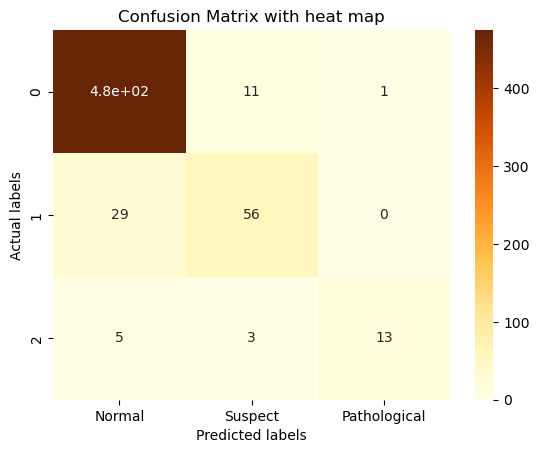

In [64]:
# This code creates a confusion matrix and its heatmap of the predictions
print("confusion Matrix:")
print(confusion_matrix(y_test1, pred_knn1))

ax1= plt.subplot()
sns.heatmap(confusion_matrix(y_test1, pred_knn1), annot=True, ax = ax1, cmap = "YlOrBr");

ax1.set_xlabel("Predicted labels"); # x-axis label
ax1.set_ylabel("Actual labels");      # y-axis label
ax1.set_title("Confusion Matrix with heat map");  # title
ax1.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]); # ticks